# Twitter Sentiment Analysis from the Stanford Network Analysis

### Steps followed: 
##### Step 1: Downloading the dataset and  
##### Step 2: Creating and analyzing the graph 

## Step 1

GZip application is used for compression and decompression of files. It is a part of GNU project. 
> Python’s gzip module is the interface to GZip application. The gzip data compression algorithm itself is based on zlib module.
> The gzip module contains definition of GzipFile class along with its methods. 
> It also caontains convenience function open(), compress() and decompress().

#### The dataset can be download from the stanford large network dataset collection. http://snap.stanford.edu/data/#socnets
> The dataset we have choosen here Twitter.


In [ ]:
!gzip -d /content/twitter_combined.txt.gz

After decompress of the file, then we can observe the txt (text file) of **Twitter**
> ***!head*** can use see the first line of text file or any file

In [ ]:
!head /content/twitter_combined.txt

214328887 34428380
17116707 28465635
380580781 18996905
221036078 153460275
107830991 17868918
151338729 222261763
19705747 34428380
222261763 88323281
19933035 149538028
158419434 17434613


### Importing the necessary libraries 
#### Numpy: 
>NumPy is a Python library used for working with arrays and also working in domain of linear algebra, fourier transform, and matrices.
>In Python we have lists that serve the purpose of arrays, but they are slow to process. NumPy aims to provide an array object that is faster than traditional Python lists.

#### Pandas:
>Pandas is a software library written for the Python programming language for data manipulation and analysis.

#### Netwrokx:
>In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.
Also NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Show matplotlib charts in cells
%matplotlib inline

## Step 2
### Loading the dataset 
read_csv is an important pandas function to read csv files and do operations on it.
The parameters are:

***1) Filepath_or_bufferstr:*** Any valid string path is acceptable. 

***2) Sep:*** str, default ‘,’
Delimiter to use. If sep is None, the C engine cannot automatically detect the separator.

***3) Names:*** List of column names to use. If the file contains a header row, then you should explicitly pass ***header=0*** to override the column names.

***4) Nrows:*** It helps select specific the number of rows of the files.

In [ ]:
raw_dataset = pd.read_csv('/content/twitter_combined.txt', sep = ' ', names = ['Source','Destination'], header=0, nrows = 5500)

In [ ]:
raw_dataset.head()

,Source,Destination
0,17116707,28465635
1,380580781,18996905
2,221036078,153460275
3,107830991,17868918
4,151338729,222261763


### nx.from pandas edgelist
Returns a graph from Pandas DataFrame containing an edge list.
The Pandas DataFrame should contain at least two columns of node names and zero or more columns of edge attributes. Each row will be processed as one edge instance.

Parameter are: 

**`df`** – An edge list representation of a graph.

**`source`** – A valid column name for the source nodes (for the directed case).

**`target`** – A valid column name for the target nodes (for the directed case).
### DiGraph
The `DiGraph` class to construct our network object. It is a ***directed graph***, this means that direction of edges is important. 

In [ ]:
twitter = nx.from_pandas_edgelist(raw_dataset,'Source','Destination',create_using=nx.DiGraph)

> `info` - analyze the information of the graph.  

In [ ]:
print(nx.info(twitter))

Name: 
Type: DiGraph
Number of nodes: 220
Number of edges: 5500
Average in degree:  25.0000
Average out degree:  25.0000


### Network Density

A measure of how many edges a Graph has (i.e., of "how complete" is a graph).


A more precise definition varies depending on type of graph and the context in which the question is asked: e.g., for a complete undirected graph the density is $1$, while for an empty graph it is $0$.

>Directed graphs: $$D = \frac{|E|}{|N|(|N|-1)}$$


In [ ]:
Network_Density = nx.density(twitter)
print('The density of Twitter :', Network_Density)

The density of Twitter : 0.1141552511415525


### Centrality:
`Who is more important user in the network?`

For answer this question there are three measures for the centrality will be used: 
- Degree centrality
- Closeness centrality
- Betweness centrality



#### Degree centrality
The degree centrality for a node v is the fraction of nodes it is connected to.
If the network is directed like, then two separate measures of degree centrality are defined: **indegree** and **outdegree**.  

- ***`In-degree:`*** is a count of the number of ties directed to the node.

- ***`out-degree:`*** is the number of ties that the node directs to others.

In directed graphs, this measure helps distinguishing:

- ***`Authorities:`*** nodes with the highest indegrees.

- ***`Hubs:`*** nodes with the highest outdegrees

In [ ]:
print("Degree centrality is:")

degreecentrality = nx.degree_centrality(twitter)
degreecentrality_sorted = {k: v for k, v in sorted(
    degreecentrality.items(),
    key=lambda item: item[1],
    reverse=True
)}
# Degree Centrality
degree_centrality = dc_sorted.items()
degree_dataframe = pd.DataFrame(columns=['Degree', 'Centrality'])
for node, close in degree_centrality:
  degree_dataframe = degree_dataframe.append({
      'Degree': node,
      'Centrality': close,
  }, ignore_index=True)

# observing the head of the dataframe.
degree_dataframe.head(5)

Degree centrality is:


,Degree,Centrality
0,40981798.0,0.515222
1,43003845.0,0.508197
2,153226312.0,0.463700
3,270449528.0,0.426230
4,83943787.0,0.416862


#### In-Degree Centrality:
Count the number of ties directed to the node.

In [ ]:
print("In-degree centrality")
in_dc = nx.in_degree_centrality(twitter)
in_dc_sorted = {k: v for k, v in sorted(
    in_dc.items(),
    key=lambda item: item[1],
    reverse=True
)}
# In degree centrality:
in_degree = in_dc_sorted.items()
in_degree_df = pd.DataFrame(columns=['In-degree', 'Centrality'])
for node, close in in_degree:
  in_degree_df = in_degree_df.append({
      'In-degree': node,
      'Centrality': close,
  }, ignore_index=True)

# observing the head of the dataframe.
in_degree_df.head(5)

In-degree centrality


,In-degree,Centrality
0,40981798.0,0.538813
1,22462180.0,0.502283
2,43003845.0,0.493151
3,34428380.0,0.447489
4,18996905.0,0.378995


#### Out-Degree Centrality:
The number of ties that the node directs to others

In [ ]:
print("\n Out-degree centrality")
out_dc = nx.out_degree_centrality(twitter)
out_dc_sorted = {k: v for k, v in sorted(
    out_dc.items(),
    key=lambda item: item[1],
    reverse=True
)}

out_degree = out_dc_sorted.items()
out_degree_df = pd.DataFrame(columns=['Out-degree', 'Centrality'])
for node, close in out_degree:
  out_degree_df = out_degree_df.append({
      'Out-degree': node,
      'Centrality': close,
  }, ignore_index=True)

out_degree_df.head(10)


 Out-degree centrality


,Out-degree,Centrality
0,153226312.0,0.406393
1,279787626.0,0.365297
2,100581193.0,0.351598
3,358775055.0,0.342466
4,463952369.0,0.315068
5,270449528.0,0.305936
6,461410856.0,0.305936
7,134940306.0,0.305936
8,394263193.0,0.292237
9,236184723.0,0.283105


#### Hubs

In [ ]:
hubs = sorted(
    twitter.out_degree,
    key=lambda x: x[1],
    reverse=True
)[:10]

df_hubs = pd.DataFrame(columns=['Hubs'])

for h in hubs:
  df_hubs = df_hubs.append({
      'Hubs': h
  }, ignore_index=True)
# The hubs 
df_hubs

,Hubs
0,"(153226312, 89)"
1,"(279787626, 80)"
2,"(100581193, 77)"
3,"(358775055, 75)"
4,"(463952369, 69)"
5,"(270449528, 67)"
6,"(461410856, 67)"
7,"(134940306, 67)"
8,"(394263193, 64)"
9,"(236184723, 62)"


#### Authorities 

In [ ]:
authorities = sorted(
    twitter.in_degree,
    key=lambda x: x[1],
    reverse=True
)[:10]

df_authorities = pd.DataFrame(columns=['Authorities'])

for a in authorities:
  df_authorities = df_authorities.append({
      'Authorities': a
  }, ignore_index=True)

# The authorities 
df_authorities

,Authorities
0,"(40981798, 118)"
1,"(22462180, 110)"
2,"(43003845, 108)"
3,"(34428380, 98)"
4,"(18996905, 83)"
5,"(31331740, 78)"
6,"(83943787, 75)"
7,"(28465635, 72)"
8,"(27633075, 72)"
9,"(151338729, 71)"


#### Closeness centrality
It considered important that node is relatively close to all other node

In [ ]:
print("\nCloseness centrality")
cc = nx.closeness_centrality(twitter)
cc_sorted = {k: v for k, v in sorted(
    cc.items(),
    key=lambda item: item[1],
    reverse=True
)}

c_cent = cc_sorted.items()
cc_df = pd.DataFrame(columns=['Closeness', 'Centrality'])
for node, close in c_cent:
  cc_df = cc_df.append({
      'Closeness': node,
      'Centrality': close,
  }, ignore_index=True)


cores = cc_sorted
print(cores) 





Closeness centrality
{40981798: 0.6416900478626836, 43003845: 0.6157257106659276, 22462180: 0.6035158523807675, 34428380: 0.5901415398626342, 18996905: 0.5636007827788649, 31331740: 0.5504937878305193, 17868918: 0.5379825653798256, 83943787: 0.5379825653798256, 28465635: 0.5339375836852405, 8088112: 0.5326027397260275, 151338729: 0.5312745533426707, 133055665: 0.5273294452732945, 56860418: 0.5247317632768743, 19493072: 0.5196124290010024, 259842341: 0.5183481651834817, 195475105: 0.5183481651834817, 27633075: 0.5133520382901469, 19358562: 0.5133520382901469, 117674417: 0.512118018967334, 187773078: 0.5084513028410763, 158419434: 0.5072407045009784, 314316607: 0.5072407045009784, 69592091: 0.5060358572218788, 26929220: 0.5060358572218788, 2367911: 0.5060358572218788, 116036694: 0.5048367201194571, 276706356: 0.503643252696007, 204140367: 0.503643252696007, 307458983: 0.5024554148358749, 153226312: 0.5012731668009669, 14925700: 0.4989252831157165, 157829215: 0.4989252831157165, 12153378

#### Betweenness centrality
- Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.
- It is a measure of centrality in a graph based on shortest paths and for each vertex is the number of these shortest paths that pass through the vertex.

In [ ]:
print("\nBetweenness centrality")
bc = nx.betweenness_centrality(twitter)
bc_sorted = {k: v for k, v in sorted(
    bc.items(),
    key=lambda item: item[1],
    reverse=True
)}

bc_cent = bc_sorted.items()
bc_df = pd.DataFrame(columns=['User', 'Centrality'])
for node, close in bc_cent:
  bc_df = bc_df.append({
      'User': node,
      'Centrality': close,
  }, ignore_index=True)

bc_df.head(10)



Betweenness centrality


,User,Centrality
0,43003845.0,0.061440
1,461410856.0,0.055742
2,40981798.0,0.053777
3,28465635.0,0.050971
4,88323281.0,0.041414
5,153226312.0,0.037795
6,2367911.0,0.036555
7,186212304.0,0.033887
8,158419434.0,0.032632
9,276706356.0,0.030688


#### Gatekeepers

Gatekeepers hold a critical position between other nodes that are not directly linked and thus, in a network, they are nodes that provide a connection, and serve as a bridge; their critical positions can naturally achieve a certain level of power.

**Gatekeepers** are the nodes of a network that have *the highest betweenness centrality*.

In [ ]:
gatekeepers = sorted(nx.betweenness_centrality(twitter).items(),
                     key = lambda x : x[1], 
                     reverse=True)[:3]

print("Network gatekeepers:")
for g in gatekeepers:
  print(g)

Network gatekeepers:
(43003845, 0.06143988272061368)
(461410856, 0.05574222382504563)
(40981798, 0.053776608742926606)


### Undirected Graph
Transformed the direct graph into a undirect graph to analyze the data.


In [ ]:
Undirected = twitter.to_undirected()
connected_components = list(nx.connected_components(Undirected))
# In this case, the component is only one
connected_component = Undirected.subgraph(connected_components[0])
diameter = nx.diameter(connected_component)
avg_path = nx.average_shortest_path_length(connected_component)
print("\n Diameter: \n", diameter)
print("\n Average path length: \n {:.2f}".format(avg_path))


 Diameter: 
 4

 Average path length: 
 1.99


### Cliques
***Cliques:*** maximal, complete subgraphs:

∀u,v∈S,∃(u,v)∈E , with  E  the set of edges of the graph.

>A clique is a group of people where everybody is connected directly to everyone else.

***N-cliques:*** a subgraph in which all nodes are connected and the maximum distance between two nodes is  N.

The clique number of a graph is the size of the largest clique in the graph.

In [ ]:
from networkx.algorithms import approximation, clique
n_of_cliques = clique.graph_number_of_cliques(Undirected)
print("\n Number of cliques in the network: \n", n_of_cliques)

# Let's print some cliques
print("\n The First ten cliques in the network:")
all_cliques = clique.find_cliques(Undirected)
twenty_cliques = list(all_cliques)
for n,c in enumerate(twenty_cliques[:10]):
  print(n,c)


 Number of cliques in the network: 
 48235

 The First ten cliques in the network:
0 [451493376, 287915525, 49104918, 73738774]
1 [287915525, 253091523]
2 [287915525, 49104918, 40981798]
3 [287915525, 49104918, 260705759]
4 [15150609, 93224416, 253091523]
5 [15150609, 93224416, 17434613]
6 [15150609, 93224416, 35148062]
7 [15150609, 33806113]
8 [15150609, 253091523, 100052945]
9 [15150609, 253091523, 28465635]


In [ ]:
# Maximum clique
max_clique = approximation.clique.max_clique(ego_network)
print('\n The clique: \n', max_clique)

# Clique number of the graph (size of the largest clique in the network)
graph_clique_number = clique.graph_clique_number(Undirected)
print('\n Clique number of the graph: \n', graph_clique_number)


 The clique: 
 {37699718, 200559228, 40981798}

 Clique number of the graph: 
 14


### Ego Networks
Ego networks consist of a ***focal node***, or ***ego node***, and the nodes to whom ego is directly connected to (called alters) plus the ties, if any, among the alters.

In [ ]:
ego = list(cores)[0]  #First node
## Ego network
ego_network = nx.ego_graph(twitter, ego)


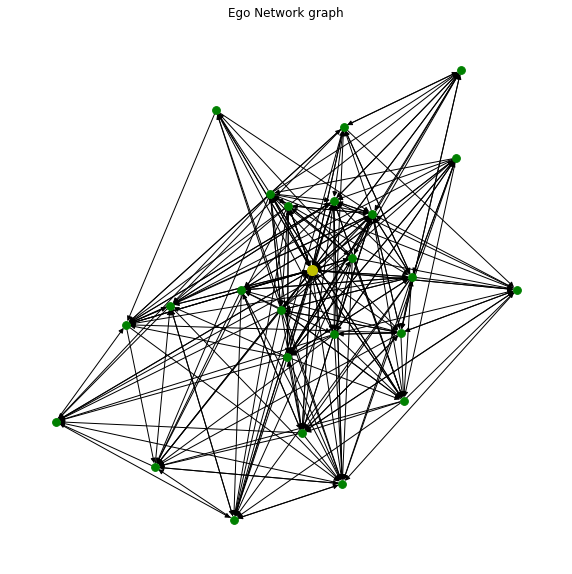

In [ ]:
# ego network graph
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('Ego Network graph')

labels = {}    
for node in twitter.nodes():
  if node == "40981798" or node == "153226312":
    # set the node name as the key and the label as its value 
    labels[node] = node

pos = nx.spring_layout(ego_network)
nx.draw(ego_network, pos, node_color='g', node_size=60, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(ego_network, pos, nodelist=[ego], node_size=100, node_color='y')
nx.draw_networkx_labels(ego_network, pos, labels, font_size=20, font_color="r", font_family="sans-serif", verticalalignment="bottom")
plt.show()


## Conclusion

In this lab work,I have shown how to analyze the graph, different measurements of graph like **diameter** and **average path** and also ***Ego Networks***.

I have taken TWITTER dataset, but as the data is huge for load. So I have choosen ***few data*** (Number of rows: 5500).